<a href="https://colab.research.google.com/github/nobertomaciel/AI-UNIFACS/blob/main/CNN/cnn_mnist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import files
import io

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)



print('x_train_shape:',x_train.shape)
print('no of images in x train',x_train.shape[0])
print('no of images in x test',x_test.shape[0])





model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.1)


test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

predictions = model.predict(x_test)

x_train_shape: (60000, 28, 28, 1)
no of images in x train 60000
no of images in x test 10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3583 - loss: 1.8278 - val_accuracy: 0.9275 - val_loss: 0.3104
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8972 - loss: 0.3962
Test accuracy: 0.9114999771118164
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


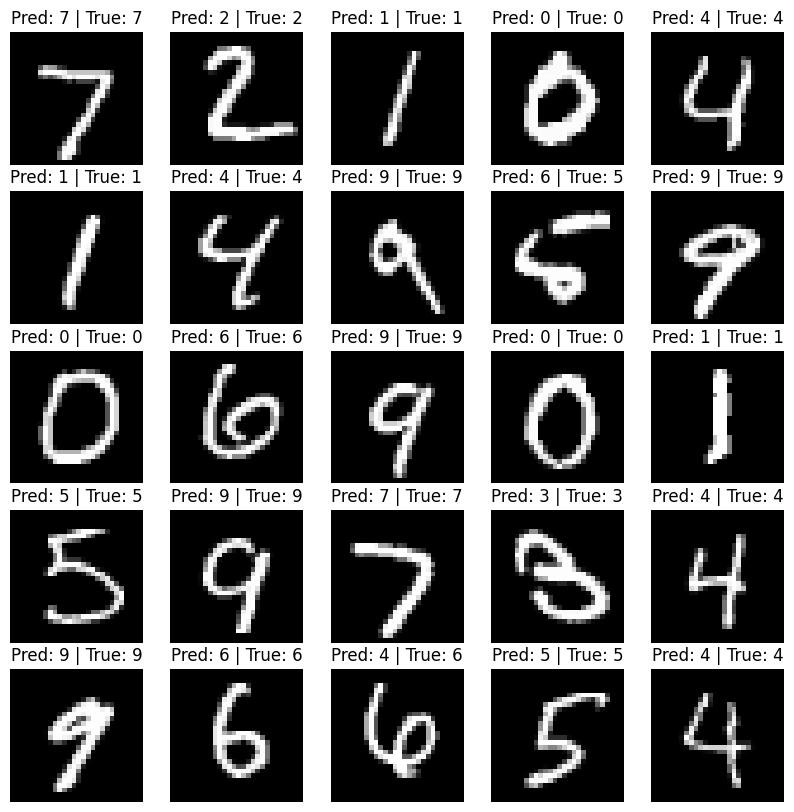

In [30]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i, :, :, 0], cmap="gray")
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title("Pred: {} | True: {}".format(predicted_label, true_label))
    plt.axis("off")
plt.show()

In [31]:
# teste com imagem real
uploaded = files.upload()

for nome_arquivo in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[nome_arquivo])).convert("L").resize((28, 28))
    image.show()
    image.show()
    image_arr = np.array(image).astype("float32") / 255.0
    image_arr = np.expand_dims(image_arr, 0)
    image_arr = np.expand_dims(image_arr, -1)
    prediction = model.predict(image_arr)
    predicted_label = np.argmax(prediction)
    model.evaluate(x_test,y_test)
    print("----------------------------------------------------------------------------")
    print("Predicted label:", predicted_label)
    break

Saving number7.png to number7 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8972 - loss: 0.3962
----------------------------------------------------------------------------
Predicted label: 7
